In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

## Đọc dữ liệu

In [2]:
data = pd.read_csv("train-house-prices-advanced-regression-techniques.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


- `SalePrice` - Giá bán của căn nhà
- `MSSubClass`: Loại tòa nhà (phân loại theo kiểu nhà ở)
- `MSZoning`: Phân vùng sử dụng đất tổng quát
- `LotFrontage`: Chiều dài mặt tiền (số feet tiếp giáp đường phố)
- `LotArea`: Diện tích lô đất (tính theo feet vuông)
- `Street`: Loại đường tiếp cận ngôi nhà
- `Alley`: Loại ngõ hoặc lối đi phía sau nhà
- `LotShape`: Hình dạng tổng thể của lô đất
- `LandContour`: Độ bằng phẳng của lô đất
- `Utilities`: Các tiện ích có sẵn
- `LotConfig`: Cấu hình lô đất
- `LandSlope`: Độ dốc của lô đất
- `Neighborhood`: Vị trí địa lý trong giới hạn thành phố Ames
- `Condition1`: Mức độ gần với đường chính hoặc đường sắt
- `Condition2`: Mức độ gần với đường chính hoặc đường sắt (nếu có cái thứ hai)
- `BldgType`: Loại hình nhà ở
- `HouseStyle`: Phong cách nhà ở
- `OverallQual`: Chất lượng vật liệu và hoàn thiện tổng thể
- `OverallCond`: Đánh giá tình trạng tổng thể
- `YearBuilt`: Năm xây dựng ban đầu
- `YearRemodAdd`: Năm cải tạo/sửa chữa
- `RoofStyle`: Kiểu mái nhà
- `RoofMatl`: Vật liệu mái nhà
- `Exterior1st`: Lớp phủ bên ngoài ngôi nhà (lần đầu)
- `Exterior2nd`: Lớp phủ bên ngoài ngôi nhà (nếu có nhiều hơn một vật liệu)
- `MasVnrType`: Loại vật liệu ốp tường gạch/đá
- `MasVnrArea`: Diện tích ốp tường gạch/đá (tính theo feet vuông)
- `ExterQual`: Chất lượng vật liệu bên ngoài
- `ExterCond`: Tình trạng hiện tại của vật liệu bên ngoài
- `Foundation`: Loại móng nhà
- `BsmtQual`: Chiều cao của tầng hầm
- `BsmtCond`: Tình trạng chung của tầng hầm
- `BsmtExposure`: Tường tầng hầm có lối ra ngoài hoặc vườn
- `BsmtFinType1`: Chất lượng khu vực tầng hầm đã hoàn thiện (loại 1)
- `BsmtFinSF1`: Diện tích tầng hầm đã hoàn thiện loại 1 (tính theo feet vuông)
- `BsmtFinType2`: Chất lượng khu vực tầng hầm đã hoàn thiện (loại 2, nếu có)
- `BsmtFinSF2`: Diện tích tầng hầm đã hoàn thiện loại 2 (tính theo feet vuông)
- `BsmtUnfSF`: Diện tích tầng hầm chưa hoàn thiện (tính theo feet vuông)
- `TotalBsmtSF`: Tổng diện tích tầng hầm (tính theo feet vuông)
- `Heating`: Loại hệ thống sưởi
- `HeatingQC`: Chất lượng và tình trạng hệ thống sưởi
- `CentralAir`: Điều hòa không khí trung tâm
- `Electrical`: Hệ thống điện
- `1stFlrSF`: Diện tích tầng một (tính theo feet vuông)
- `2ndFlrSF`: Diện tích tầng hai (tính theo feet vuông)
- `LowQualFinSF`: Diện tích hoàn thiện chất lượng thấp (tất cả các tầng)
- `GrLivArea`: Diện tích sinh hoạt trên mặt đất (tính theo feet vuông)
- `BsmtFullBath`: Số phòng tắm đầy đủ ở tầng hầm
- `BsmtHalfBath`: Số phòng tắm nửa ở tầng hầm
- `FullBath`: Số phòng tắm đầy đủ trên mặt đất
- `HalfBath`: Số phòng tắm nửa trên mặt đất
- `Bedroom`: Số phòng ngủ trên tầng (không tính tầng hầm)
- `Kitchen`: Số lượng nhà bếp
- `KitchenQual`: Chất lượng nhà bếp
- `TotRmsAbvGrd`: Tổng số phòng trên mặt đất (không bao gồm phòng tắm)
- `Functional`: Đánh giá chức năng của ngôi nhà
- `Fireplaces`: Số lượng lò sưởi
- `FireplaceQu`: Chất lượng lò sưởi
- `GarageType`: Vị trí gara
- `GarageYrBlt`: Năm gara được xây dựng
- `GarageFinish`: Hoàn thiện nội thất của gara
- `GarageCars`: Sức chứa gara (số lượng xe ô tô)
- `GarageArea`: Diện tích gara (tính theo feet vuông)
- `GarageQual`: Chất lượng gara
- `GarageCond`: Tình trạng gara
- `PavedDrive`: Đường lái xe được lát
- `WoodDeckSF`: Diện tích sàn gỗ ngoài trời (tính theo feet vuông)
- `OpenPorchSF`: Diện tích hiên mở (tính theo feet vuông)
- `EnclosedPorch`: Diện tích hiên kín (tính theo feet vuông)
- `3SsnPorch`: Diện tích hiên ba mùa (tính theo feet vuông)
- `ScreenPorch`: Diện tích hiên có màn chắn (tính theo feet vuông)
- `PoolArea`: Diện tích hồ bơi (tính theo feet vuông)
- `PoolQC`: Chất lượng hồ bơi
- `Fence`: Chất lượng hàng rào
- `MiscFeature`: Các tính năng linh tinh không được đề cập trong các danh mục khác
- `MiscVal`: Giá trị của tính năng linh tinh
- `MoSold`: Tháng bán
- `YrSold`: Năm bán
- `SaleType`: Loại hình bán
- `SaleCondition`: Điều kiện bán


## EDA

In [3]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
data.shape

(1460, 81)

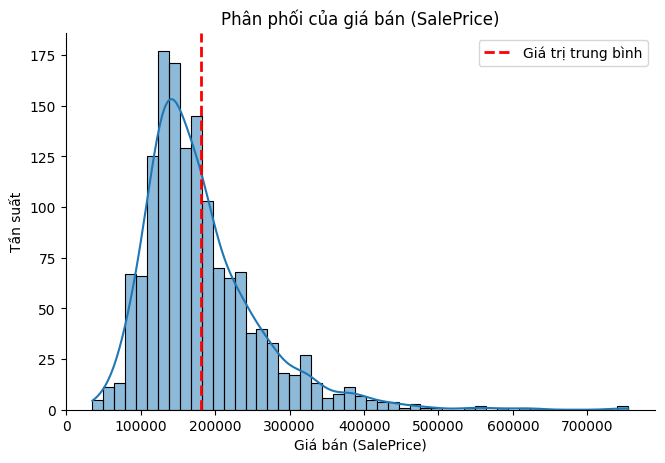

In [6]:
sns.displot(data['SalePrice'], kde=True, height=4.5, aspect=1.5)
plt.axvline(x=data['SalePrice'].mean(), color='red', linestyle="--", linewidth=2, label='Giá trị trung bình')

plt.title("Phân phối của giá bán (SalePrice)")
plt.xlabel("Giá bán (SalePrice)") 
plt.ylabel("Tần suất") 
plt.legend() 
plt.show()

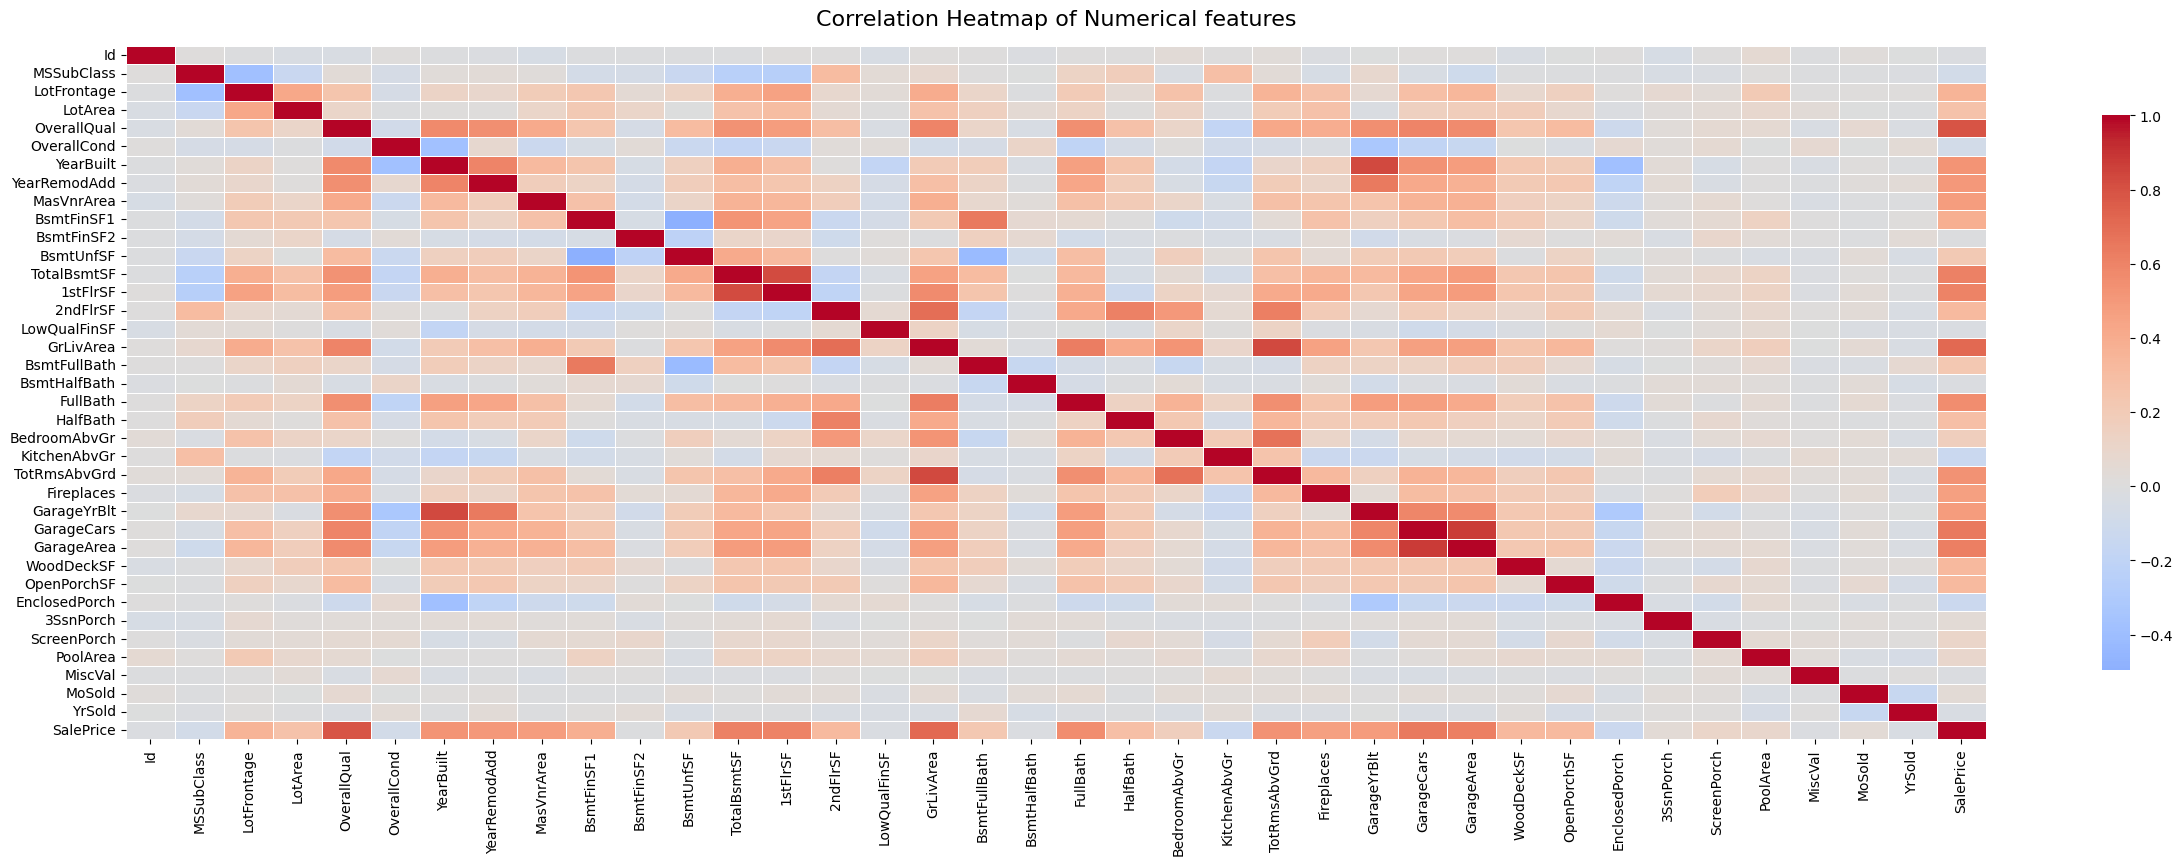

In [7]:
plt.figure(figsize=(30, 9))
sns.heatmap(
    data.corr(numeric_only=True),
    cmap='coolwarm',
    linewidths=0.5,
    center=0,
    cbar_kws={"shrink": 0.8}
)
plt.title("Correlation Heatmap of Numerical features", fontsize=16, pad=15)
plt.show()

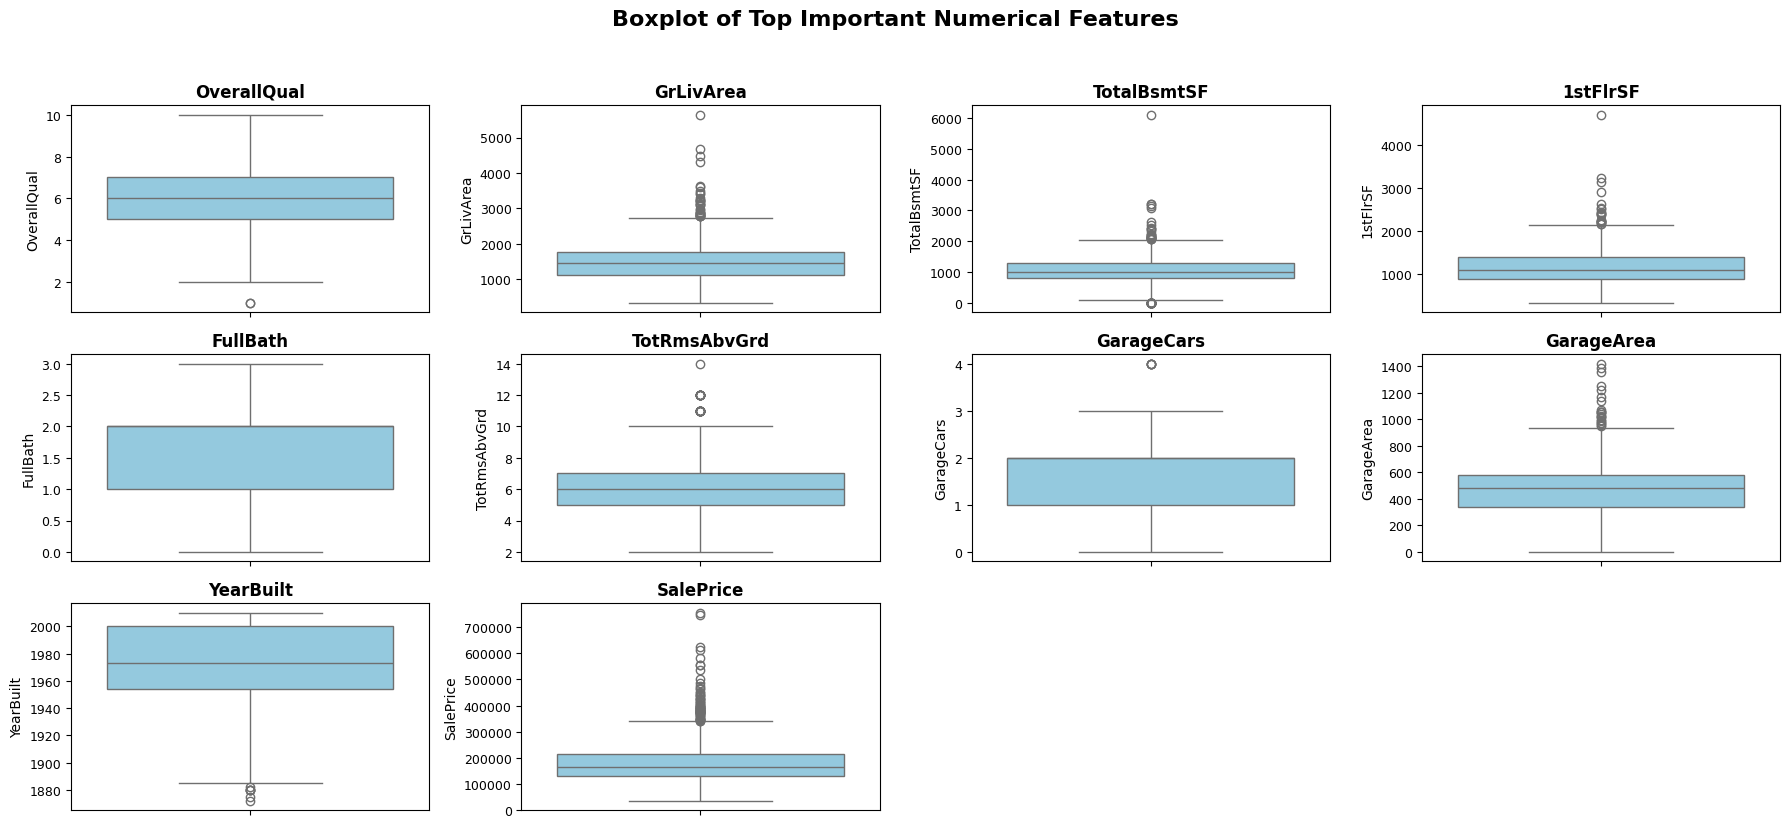

In [8]:
important_num_cols = [
    "OverallQual", "GrLivArea", "TotalBsmtSF", "1stFlrSF", 
    "FullBath", "TotRmsAbvGrd", "GarageCars", "GarageArea", "YearBuilt", "SalePrice"
]
fig, axes = plt.subplots(3, 4, figsize=(18,8))
axes = axes.flatten()

for i, col in enumerate(important_num_cols):
    sns.boxplot(data=data, y=col, ax=axes[i], color='skyblue')
    axes[i].set_title(col, fontsize=12, fontweight='bold')
    axes[i].tick_params(labelsize=9)

for i in range(len(important_num_cols), len(axes)):
    axes[i].set_visible(False)

plt.suptitle("Boxplot of Top Important Numerical Features", fontsize=16, fontweight="bold", y=1.03)
plt.tight_layout()
plt.show()

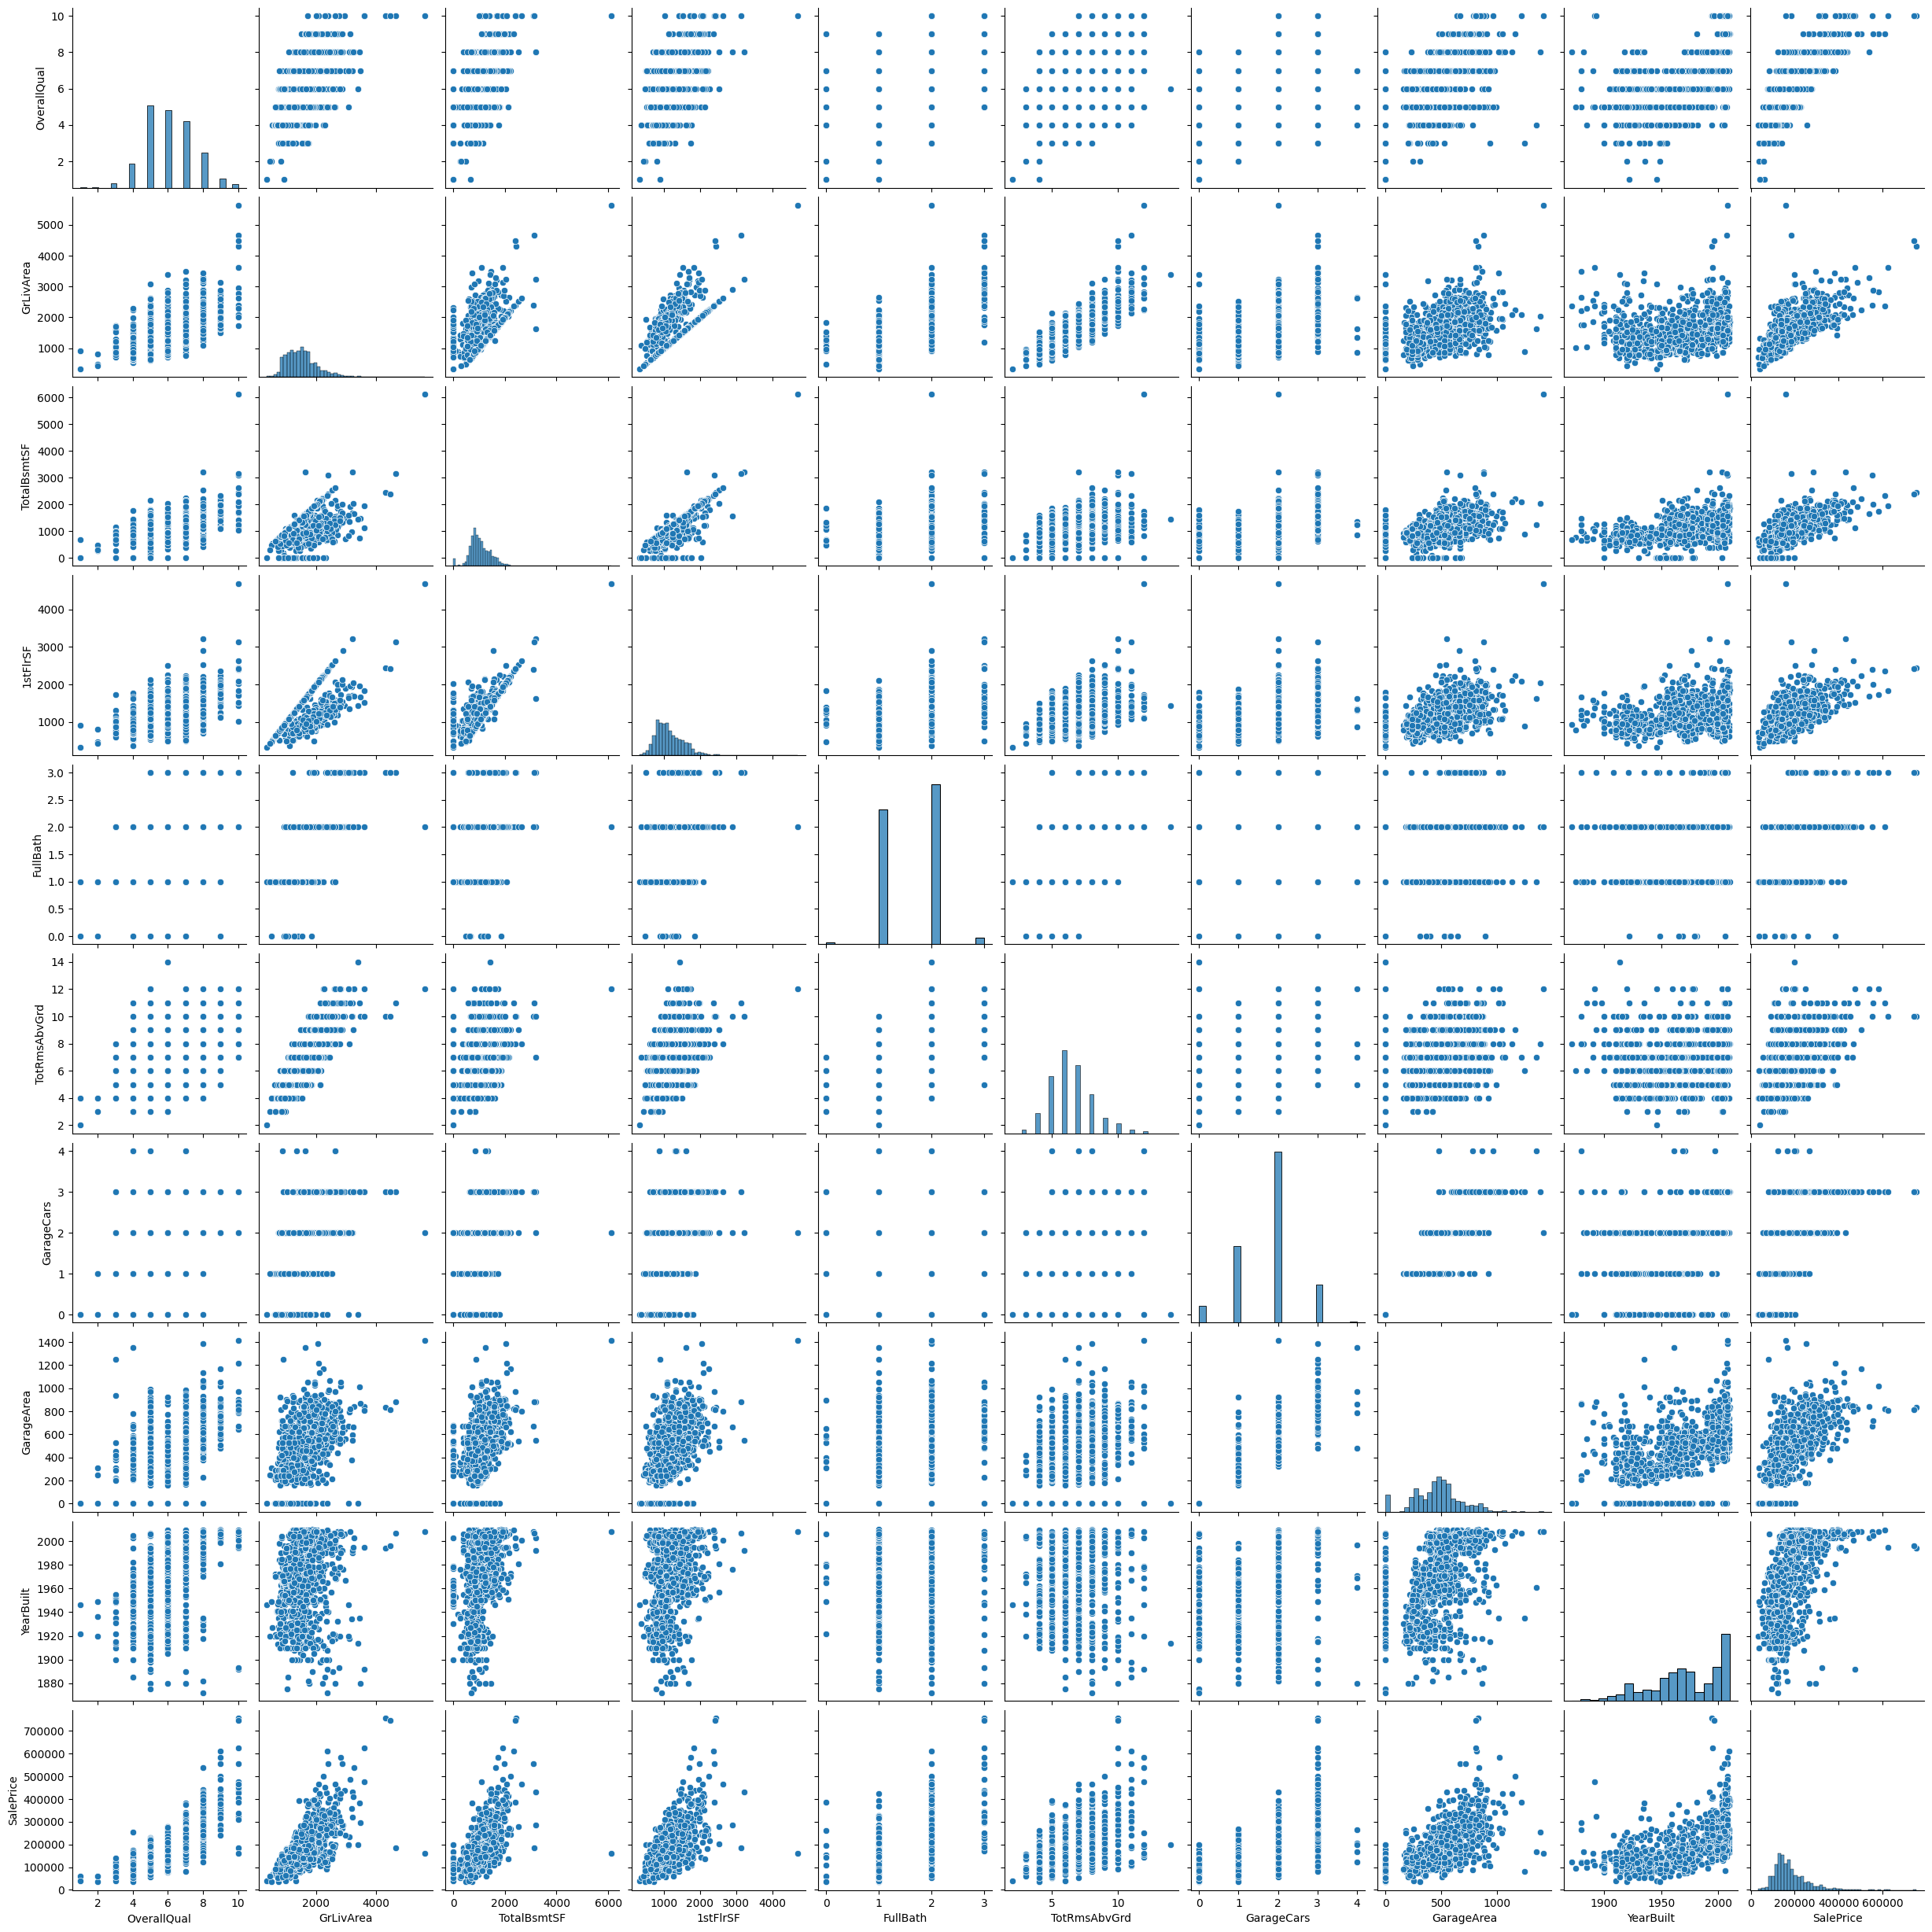

In [9]:
sns.pairplot(data[important_num_cols])

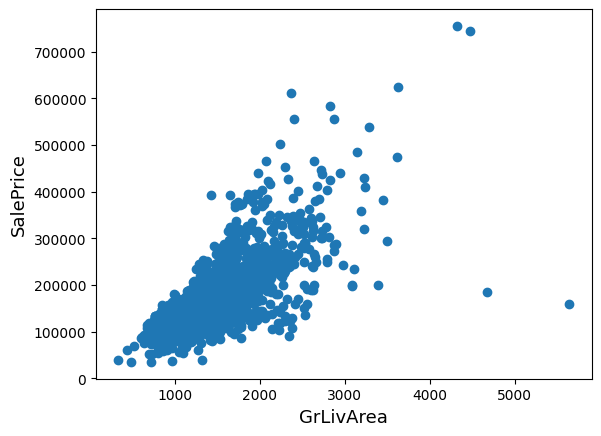

In [10]:
fig, ax = plt.subplots()
ax.scatter(x = data['GrLivArea'], y = data['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

Chúng ta có thể thấy ở phía dưới bên phải có hai GrLivArea cực lớn nhưng có mức giá thấp. Những giá trị này là **Outliers**. Vì vậy, chúng ta có thể xóa chúng một cách an toàn.

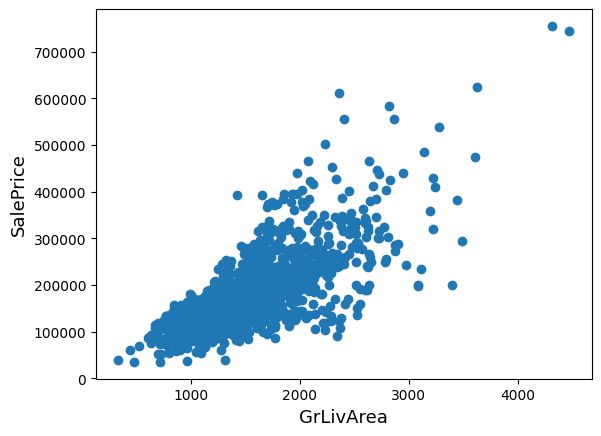

In [11]:
data = data.drop(data[(data['GrLivArea']>4000) & (data['SalePrice']<300000)].index)

fig, ax = plt.subplots()
ax.scatter(data['GrLivArea'], data['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

Loại bỏ các cột có tỷ lệ giá trị bị thiếu vượt 50%

In [12]:
missing = (data.isnull().sum() / len(data)) * 100
missing = missing.drop(missing[missing == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({"Missing Ratio": missing})
missing_data.head(10)

,Missing Ratio
PoolQC,99.588477
MiscFeature,96.296296
Alley,93.758573
Fence,80.727023
MasVnrType,59.807956
FireplaceQu,47.325103
LotFrontage,17.764060
GarageType,5.555556
GarageYrBlt,5.555556
GarageFinish,5.555556


Text(0.5, 1.0, 'Percentage of missing data by features')

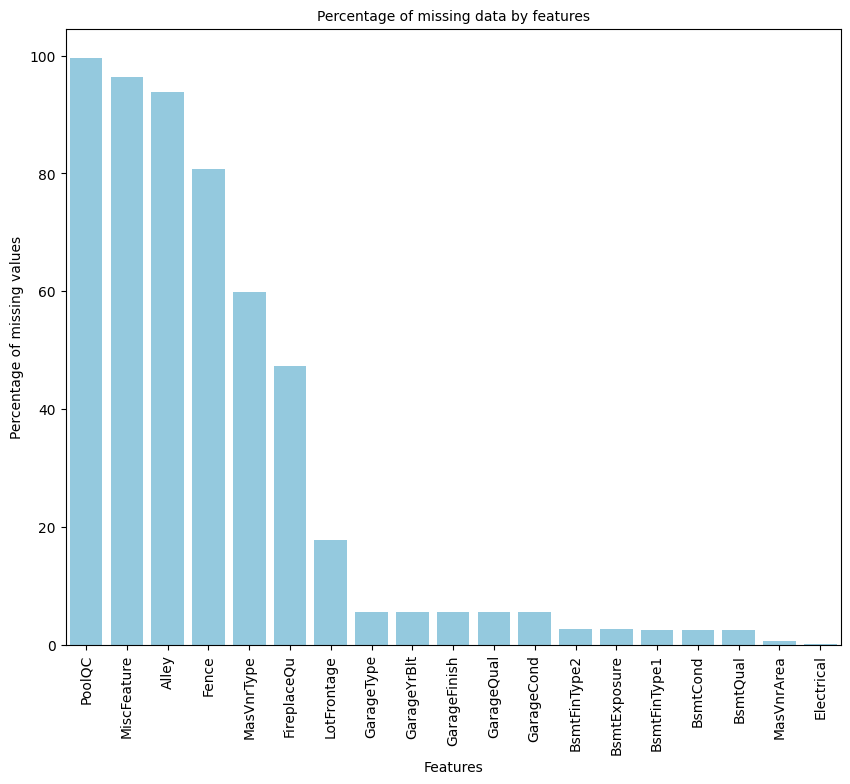

In [13]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.xticks(rotation='vertical')
sns.barplot(x=missing.index, y=missing, color='skyblue')
plt.xlabel("Features", fontsize=10)
plt.ylabel("Percentage of missing values", fontsize=10)
plt.title("Percentage of missing data by features", fontsize=10)

In [14]:
data = data.drop(["Id", "Alley", "PoolQC", "Fence", "MiscFeature", "MasVnrType"], axis=1)

## Chia tập và xử lý

In [15]:
train_df, test_df = train_test_split(
    data,
    test_size=0.25,
    random_state=42
)

In [16]:
y_train = train_df["SalePrice"].values
y_test = test_df["SalePrice"].values
train_df = train_df.drop(["SalePrice"], axis=1)
test_df = test_df.drop(["SalePrice"], axis=1)

num_cols = [col for col in train_df.columns if train_df[col].dtype in ["float64", "int64"]]
cat_cols = [col for col in train_df.columns if train_df[col].dtype not in ["float64", "int64"]]

train_df[cat_cols] = train_df[cat_cols].fillna("none")
test_df[cat_cols] = test_df[cat_cols].fillna("none")

In [17]:
encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
encoder.fit(train_df[cat_cols])

encoded_cols = list(encoder.get_feature_names_out(cat_cols))

train_df[encoded_cols] = encoder.transform(train_df[cat_cols])
test_df[encoded_cols] = encoder.transform(test_df[cat_cols])

imputer = SimpleImputer()
train_df[num_cols] = imputer.fit_transform(train_df[num_cols])
test_df[num_cols] = imputer.fit_transform(test_df[num_cols])

In [18]:
scaler = MinMaxScaler()
train_num_features = scaler.fit_transform(train_df[num_cols])
test_num_features = scaler.fit_transform(test_df[num_cols])

X_train = np.hstack([train_num_features, train_df[encoded_cols].values])
X_test = np.hstack([test_num_features, test_df[encoded_cols].values])

In [19]:
train_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
848,50.0,RL,75.00000,45600.0,Pave,IR2,Bnk,AllPub,Inside,Gtl,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
810,20.0,RL,78.00000,10140.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1384,50.0,RL,60.00000,9060.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1062,190.0,RM,85.00000,13600.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
953,60.0,RL,69.73913,11075.0,Pave,IR1,Lvl,AllPub,Inside,Mod,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,70.0,RM,60.00000,6882.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1131,20.0,RL,63.00000,10712.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1295,20.0,RL,70.00000,8400.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
861,190.0,RL,75.00000,11625.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [20]:
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso()
}

# Khởi tạo list lưu kết quả
train_rmse_results = []
test_rmse_results = []
train_r2_results = []
test_r2_results = []
model_names = []

for name, model in models.items():
    regressor = model.fit(X_train, y_train)

    # Dự đoán
    y_train_pred = regressor.predict(X_train)
    y_test_pred = regressor.predict(X_test)

    # Tính RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    # Tính R²
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Lưu kết quả
    model_names.append(name)
    train_rmse_results.append(train_rmse)
    test_rmse_results.append(test_rmse)
    train_r2_results.append(train_r2)
    test_r2_results.append(test_r2)

# Tạo DataFrame tổng hợp
df_results = pd.DataFrame({
    "Model": model_names,
    "Train_RMSE": train_rmse_results,
    "Test_RMSE": test_rmse_results,
    "Train_R2": train_r2_results,
    "Test_R2": test_r2_results
}).sort_values(by="Test_R2", ascending=False)


In [21]:
df_results

,Model,Train_RMSE,Test_RMSE,Train_R2,Test_R2
1,Ridge,19747.401757,27256.427414,0.938858,0.878731
0,LinearRegression,19286.783664,30149.973911,0.941677,0.851617
2,Lasso,19289.777809,30478.978845,0.941659,0.848360


## Polynomial

In [22]:
poly_features = PolynomialFeatures(
    degree=2, interaction_only=True, include_bias=False
)

train_poly_features = poly_features.fit_transform(train_df[num_cols])
test_poly_features = poly_features.transform(test_df[num_cols])

In [23]:
scaler = MinMaxScaler()
train_poly_features = scaler.fit_transform(train_poly_features)
test_poly_features = scaler.transform(test_poly_features)

In [24]:
X_train_poly = np.hstack([train_poly_features, train_df[encoded_cols].values])
X_test_poly = np.hstack([test_poly_features, test_df[encoded_cols].values])

In [25]:
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso()
}

r2_results = []
rmse_results = []
train_rmse_results = []
train_r2_results = []
model_names = []

for name, model in models.items():
    regressor = model.fit(X_train_poly, y_train)

    # predict
    y_train_pred = regressor.predict(X_train_poly)
    y_test_pred = regressor.predict(X_test_poly)

    # metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # store
    model_names.append(name)
    train_rmse_results.append(train_rmse)
    rmse_results.append(test_rmse)
    train_r2_results.append(train_r2)
    r2_results.append(test_r2)


# create dataframe
df_results = pd.DataFrame({
    "Model": model_names,
    "Train_RMSE": train_rmse_results,
    "Test_RMSE": rmse_results,
    "Train_R2": train_r2_results,
    "Test_R2": r2_results
}).sort_values(by="Test_R2", ascending=False)

In [27]:
df_results

,Model,Train_RMSE,Test_RMSE,Train_R2,Test_R2
1,Ridge,14685.267237,22075.447106,0.966187,0.920452
2,Lasso,12224.447143,28331.014629,0.976570,0.868981
0,LinearRegression,9803.321805,129330.936540,0.984932,-1.730338
